# Beer consumption in São Paulo.

[data sourse](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo/code)

## Introduction

Beer is one of the most democratic and consumed drinks in the world. Not without reason, it is perfect for almost every situation, from happy hour to large wedding parties. If you just think about it, you already feel like having a beer, you’re not alone.

But what can influence consumer's decision to grab a beer? Could it be bad weather, season or something else? 
In this project I tried to answer this question. 

The data (sample) was collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average).

### Research Questions:
- Will beer consumption vary when there is change in weather conditions?

- Do weekends and weekdays play their role in beer consumption?

- Which season and month of the year have more beer consumption?

- I will use a linear regression to predict how much beer will be consumed. 

## Uploading libraries

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

## Uploading data

In [2]:
# Using decimal=',' to convert "," into "." in values
df = pd.read_csv("./consumo_cerveja.csv", decimal=',')

In [3]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


## Data cleaning process
1. Translate the columns name
2. Check column type and change if needed
3. Checking for missing values
4. Declare the weather seasons

In [4]:
# Renaming columns
df.columns = ['Date', 'Median Temperature', 'Min Temperature', 'Max Temperature', 'Precipitation', 'Weekend', 'Beer Consumption']

In [5]:
# Changing data type from object to float
df['Beer Consumption'] = df['Beer Consumption'].astype(float)

In [6]:
# Looking for a missing data
df.isnull().sum(axis=0)

Date                  576
Median Temperature    576
Min Temperature       576
Max Temperature       576
Precipitation         576
Weekend               576
Beer Consumption      576
dtype: int64

### Missing data in the data set 
After taking a closer look I found that below the rows with data there are 576 empty rows, which I can safely drop. 
There is no missing data for all 365 days.

In [7]:
# Dropping rows with None values and checking the result
df = df.dropna()
df.shape

(365, 7)

### Columns Description
- Date: Daily date tracking of the year 2015.
- Median Temperature: Median temperature for the day.
- Min Temperature: Min temperature for that day.
- Max Temperature: Max temperature for that day.
- Precipitation: Chance of rain for that day.
- Weekend: Boolean data type, 1: Weekend, 0: Weekday.
- Beer Consumption: The amount of beer in liters consumed for that day.

### Declare the weather seasons
To better understand the data let's extract month from the date and define seasons.
Brazil lies in the Southern Hemisphere, its seasons are the exact opposite of what Northern Hemisphere residents are used to: 
summer is December through March, winter is June through September, Autumn is April through May and Spring is October through November. 

In [8]:
# Creating "month" column
df['Date'] = pd.to_datetime(df['Date'])

df['month_number'] = pd.DatetimeIndex(df['Date']).month # Extracting numeric month from the date
df['day'] = df['Date'].apply(lambda x: x.strftime('%A')) # Extracting day as string from the date
df['month'] = df['Date'].apply(lambda x: x.strftime('%B')) # Extracting month as string from the date

In [9]:
# Declare weather seasons, where spring = october to december, summer = january to march,
#autumn = april to june, winter = july to september.
def season_range(month_number):
    if month_number <= 3: 
        return "Summer"
    elif (4 <= month_number <= 6):
        return "Autumn"
    elif (7 <= month_number <= 9):
        return "Winter"
    else: 
        return "Spring"

In [10]:
# Creating a new column with season name
df['season_range'] = df['month_number'].apply(season_range)

In [11]:
# Changing the data type to string
df['season_range'] = df['season_range'].astype(str)

## Exploratory Data Analysis

In [12]:
df.head()

,Date,Median Temperature,Min Temperature,Max Temperature,Precipitation,Weekend,Beer Consumption,month_number,day,month,season_range
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1,Thursday,January,Summer
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1,Friday,January,Summer
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1,Saturday,January,Summer
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1,Sunday,January,Summer
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1,Monday,January,Summer


### Exploring the Variables

Variables that influence Beer Consumption the most are
- Maximum Temperature(0.64)
- Median Temperature(0.57)
- Weekend(0.51) 

Text(0.5, 1.0, 'Heatmap of The Variables')

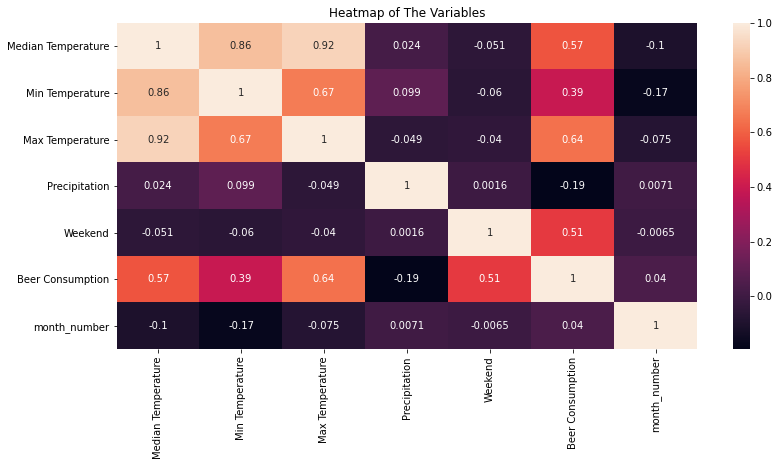

In [13]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot = True)
plt.title("Heatmap of The Variables")


###  Let's explore the weather (Temperature and Precipitation) in São Paulo throughout the year.

  In São Paulo, the summers are warm, muggy, wet, and mostly cloudy and the winters are short, cool, and partly cloudy.

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temperature (C)'),
 Text(0.5, 1.0, 'Temperature Over the Year in São Paulo')]

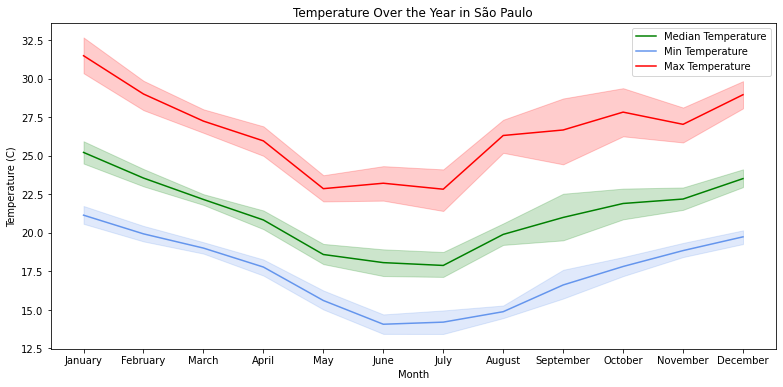

In [14]:
fig, ax = plt.subplots(figsize=(13, 6))

sns.lineplot(data = df, y= "Median Temperature", x = 'month', color = 'green', sort = False)
sns.lineplot(data = df, y= "Min Temperature", x = 'month', color = 'cornflowerblue', sort = False)
sns.lineplot(data = df, y= "Max Temperature", x = 'month', color = 'red', sort = False);
ax.legend(['Median Temperature', 'Min Temperature', 'Max Temperature'])

ax.set(xlabel="Month",
       ylabel="Temperature (C)",
       title="Temperature Over the Year in São Paulo")


Text(0.5, 1.0, 'Precipitation Over the Year')

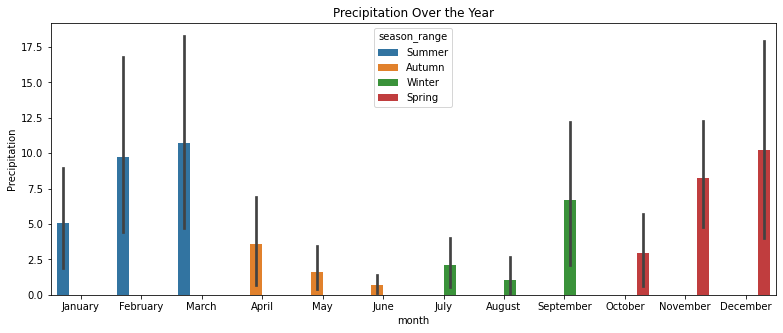

In [15]:
plt.figure(figsize=(13,5))
sns.barplot(data=df, x="month", y="Precipitation", hue='season_range')
plt.title("Precipitation Over the Year")

### And now, let's see how beer consumption was influenced by weather

<Figure size 936x360 with 0 Axes>

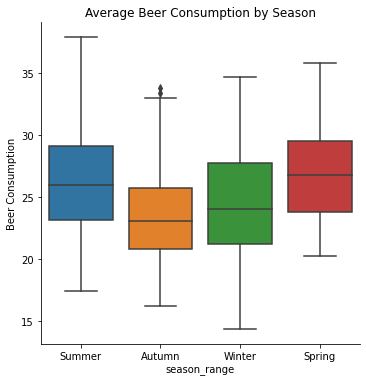

In [16]:
plt.figure(figsize=(13,5))
sns.catplot(x='season_range', y="Beer Consumption", kind="box", data=df)
plt.title("Average Beer Consumption by Season")


Text(0.5, 1.0, 'Average Beer Consumption by Month')

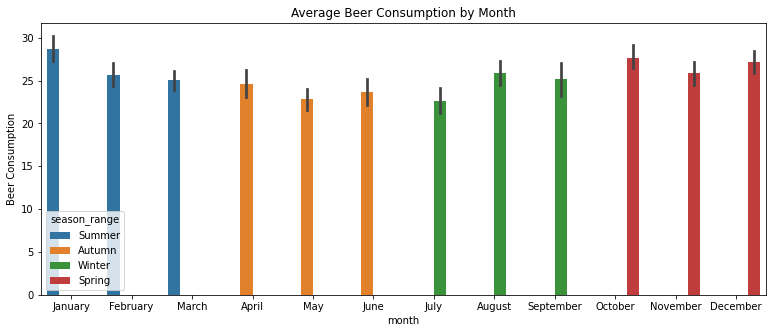

In [17]:
plt.figure(figsize=(13,5))
sns.barplot(x="month", y="Beer Consumption", hue='season_range', data=df)
plt.title("Average Beer Consumption by Month")

<Figure size 1440x864 with 0 Axes>

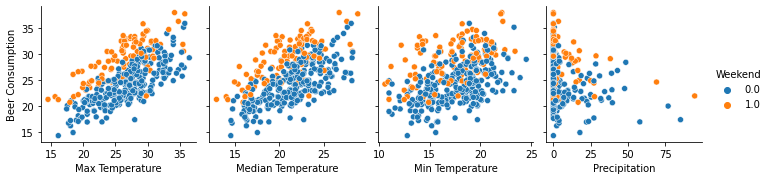

In [31]:
plt.figure(figsize=(20,12))
sns.pairplot(df, x_vars=['Max Temperature','Median Temperature','Min Temperature','Precipitation'],
             y_vars=['Beer Consumption'],hue='Weekend',diag_kind=None)

### On the charts above we see strong correlation between temperature and beer consumption, precipitation and beer consumption. 
People drink more when the weather is dry and warm. Also, the highier the temperature, the more liters of beer were consumed. The same happening with precipitation.
People consume more beer on weekends than on weekdays.
No surprise here! 

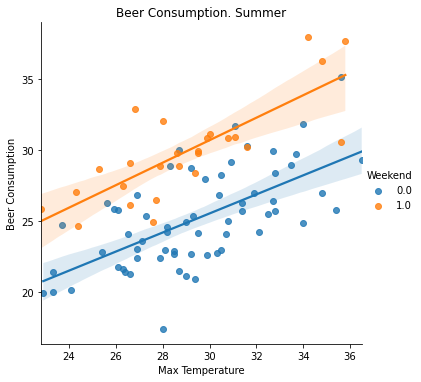

In [33]:
sns.lmplot(x="Max Temperature", y="Beer Consumption", hue='Weekend', data=df.loc[df['season_range']=='Summer'])
plt.title("Beer Consumption. Summer")


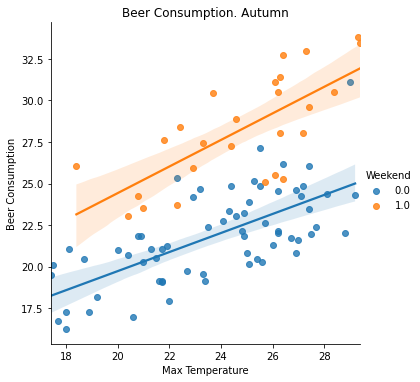

In [34]:
sns.lmplot(x="Max Temperature", y="Beer Consumption", hue='Weekend', data=df.loc[df['season_range']=='Autumn'])
plt.title("Beer Consumption. Autumn")


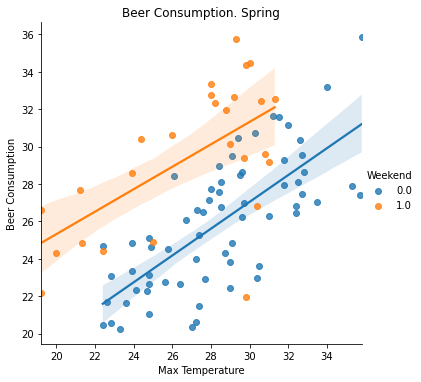

In [35]:
sns.lmplot(x="Max Temperature", y="Beer Consumption", hue='Weekend', data=df.loc[df['season_range']=='Spring'])
plt.title("Beer Consumption. Spring")


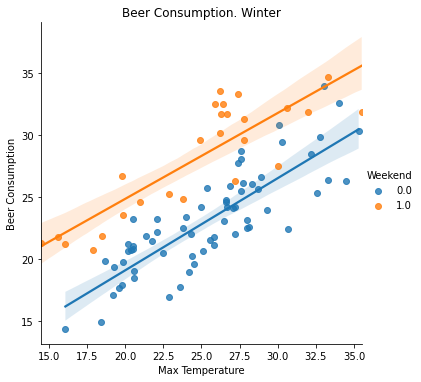

In [36]:
sns.lmplot(x="Max Temperature", y="Beer Consumption", hue='Weekend', data=df.loc[df['season_range']=='Winter'])
plt.title("Beer Consumption. Winter")
plt.savefig('output.png', dpi=300, bbox_inches='tight')

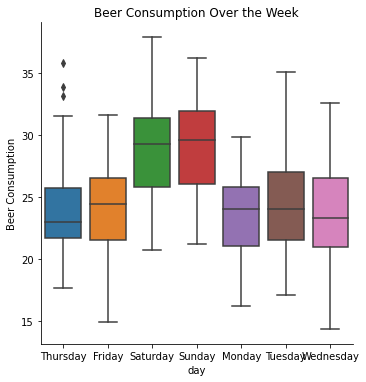

In [32]:
sns.catplot(x="day", y="Beer Consumption", kind="box", data=df)
plt.title("Beer Consumption Over the Week")
plt.savefig('output.png', dpi=300, bbox_inches='tight')

## Restructuring data

In [24]:
df.head()

,Date,Median Temperature,Min Temperature,Max Temperature,Precipitation,Weekend,Beer Consumption,month_number,day,month,season_range
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1,Thursday,January,Summer
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1,Friday,January,Summer
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1,Saturday,January,Summer
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1,Sunday,January,Summer
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1,Monday,January,Summer


In [25]:
# Declairing dependant, independant varaibles and a constant 
dependent_vars = df.iloc[:, 6]  
independent_vars =df.iloc[:, :6]
independent_vars['constant'] = 1

In [26]:
# Drop column Date, since we don't need it
independent_vars.drop(columns = ['Date'], inplace=True) 
independent_vars

,Median Temperature,Min Temperature,Max Temperature,Precipitation,Weekend,constant
0,27.30,23.9,32.5,0.0,0.0,1
1,27.02,24.5,33.5,0.0,0.0,1
2,24.82,22.4,29.9,0.0,1.0,1
3,23.98,21.5,28.6,1.2,1.0,1
4,23.82,21.0,28.3,0.0,0.0,1
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,1
361,22.64,21.1,26.7,0.0,0.0,1
362,21.68,20.3,24.1,10.3,0.0,1
363,21.38,19.3,22.4,6.3,0.0,1


In [27]:
dependent_vars

0      25.461
1      28.972
2      30.814
3      29.799
4      28.900
        ...  
360    32.307
361    26.095
362    22.309
363    20.467
364    22.446
Name: Beer Consumption, Length: 365, dtype: float64

### Building a Regression model

testing the first model

In [28]:
lin_reg = sm.OLS(dependent_vars, independent_vars) #creating a model
reg_results = lin_reg.fit() #testing
print(reg_results.summary()) #printing out the result

                            OLS Regression Results                            
Dep. Variable:       Beer Consumption   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     187.1
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           1.19e-97
Time:                        10:43:50   Log-Likelihood:                -824.07
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     359   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Median Temperature     0.0308      0

### Second Regression model

In [29]:
independent_vars2 = independent_vars.drop(columns=['Min Temperature', 'Median Temperature'])

In [30]:
lin_reg2 = sm.OLS(dependent_vars, independent_vars2) #creating a model
reg_results2 = lin_reg2.fit() #testing

print(reg_results2.summary()) #printing out the result

                            OLS Regression Results                            
Dep. Variable:       Beer Consumption   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     313.5
Date:                Thu, 23 Dec 2021   Prob (F-statistic):          3.85e-100
Time:                        10:43:50   Log-Likelihood:                -824.09
No. Observations:                 365   AIC:                             1656.
Df Residuals:                     361   BIC:                             1672.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Max Temperature     0.6685      0.028     

### Conclusion
Before using this model for adjusting and modifying the supply chain  I would suggest to find and add more relative data to this data set to make the prediction more accurate. The list of the official holidays in Brazil would be useful and since this data is relative to the university area, it would be great to know important days from a student schedule, for example, when they got holidays. 